# Project Titan X-AI Assistant for Stock Investing
# AIDI-2005-01 - CAPSTONE TERM II-Final
# Team: KENG HIN CHEONG, AU QUANG LOC NGUYEN, CHUTU LI

# *Stock Price Prediction-Long Term & NLP Stock Recommender*

In [2]:
#import needed libraries to start


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import trendln
from yahoo_fin import stock_info as si
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline

from IPython.display import display

#remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas_datareader.data as web


In [3]:
#!pip install requests_html

In [4]:
#get the stock data for stock symbol entry using pandas_datareader

stock_symbol = input("Enter a stock symbol (for example, AAPL): ")
data = web.get_data_yahoo(stock_symbol, '3/3/2017', '10/29/2020',)
data.reset_index(inplace=True,drop=False)

Enter a stock symbol (for example, AAPL): AAPL


In [5]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,778.000000,778.000000,778.000000,778.000000,7.780000e+02,778.000000
mean,196.473483,192.732008,194.504165,194.699650,3.132854e+07,191.109774
std,44.285336,42.914716,43.444063,43.714894,1.472784e+07,45.236476
min,138.789993,137.050003,138.740005,138.679993,1.136200e+07,132.735291
25%,163.907501,160.169994,162.612499,162.417507,2.149445e+07,157.392536
50%,186.275002,183.165001,184.755005,185.014999,2.711620e+07,180.984177
75%,217.155003,212.462498,214.617496,214.892494,3.643810e+07,211.266235
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


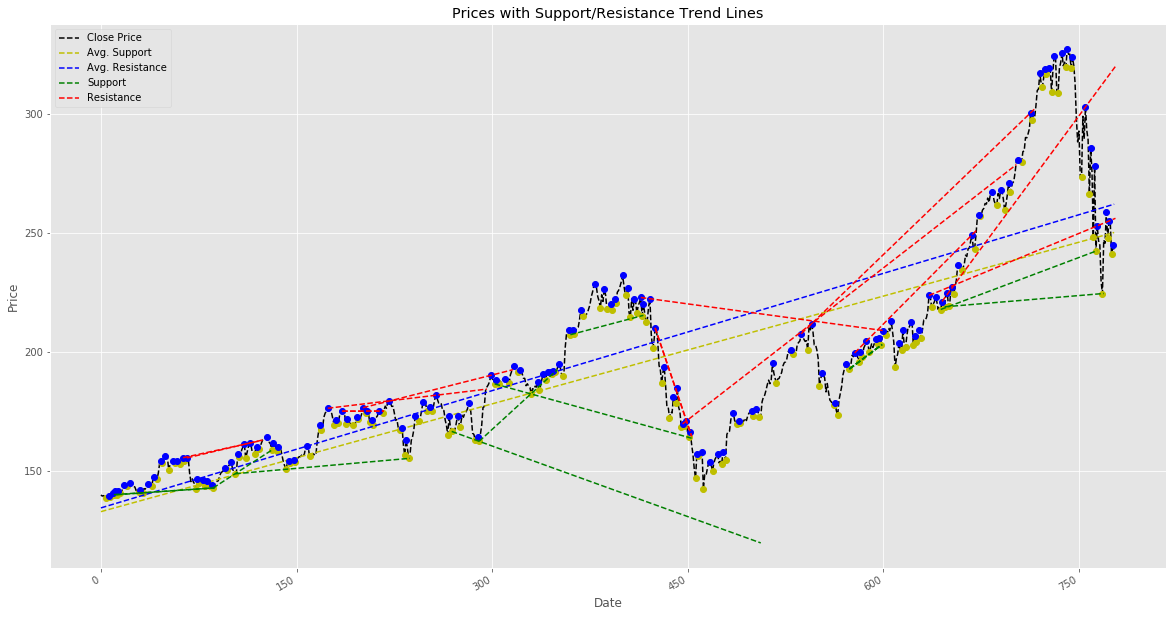

In [6]:
# showing the technical analysis
plt.figure(figsize= (20,10))
fig = trendln.plot_support_resistance(data.Close)
plt.savefig('suppres.svg', format='svg')
plt.show()


In [7]:
data.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-03-03,139.830002,138.589996,138.779999,139.779999,21108100.0,133.788147
1,2017-03-06,139.770004,138.600006,139.369995,139.339996,21750000.0,133.367004
2,2017-03-07,139.979996,138.789993,139.059998,139.520004,17446300.0,133.539307
3,2017-03-08,139.800003,138.820007,138.949997,139.000000,18707200.0,133.041580
4,2017-03-09,138.789993,137.050003,138.740005,138.679993,22155900.0,132.735291
5,2017-03-10,139.360001,138.639999,139.250000,139.139999,19612800.0,133.175598
6,2017-03-13,139.429993,138.820007,138.850006,139.199997,17421700.0,133.233002
7,2017-03-14,139.649994,138.839996,139.300003,138.990005,15309100.0,133.032028
8,2017-03-15,140.750000,139.029999,139.410004,140.460007,25691800.0,134.439026
9,2017-03-16,141.020004,140.259995,140.720001,140.690002,19232000.0,134.659134


In [8]:
data.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
768,2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,224.369995
769,2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005
770,2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004
771,2020-03-26,258.679993,246.360001,246.520004,258.440002,63021800.0,258.440002
772,2020-03-27,255.869995,247.050003,252.750000,247.740005,51054200.0,247.740005
773,2020-03-30,255.520004,249.399994,250.740005,254.809998,41994100.0,254.809998
774,2020-03-31,262.489990,252.000000,255.600006,254.289993,49250500.0,254.289993
775,2020-04-01,248.720001,239.130005,246.500000,240.910004,44054600.0,240.910004
776,2020-04-02,245.149994,236.899994,240.339996,244.929993,41419200.0,244.929993
777,2020-04-03,245.699997,240.651993,242.800003,241.827499,16656627.0,241.827499


In [9]:
#extracting the year, month, and the day from the column 'Date'
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day'] = pd.DatetimeIndex(data['Date']).day


In [10]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day
0,2017-03-03,139.830002,138.589996,138.779999,139.779999,21108100.0,133.788147,2017,3,3
1,2017-03-06,139.770004,138.600006,139.369995,139.339996,21750000.0,133.367004,2017,3,6
2,2017-03-07,139.979996,138.789993,139.059998,139.520004,17446300.0,133.539307,2017,3,7
3,2017-03-08,139.800003,138.820007,138.949997,139.000000,18707200.0,133.041580,2017,3,8
4,2017-03-09,138.789993,137.050003,138.740005,138.679993,22155900.0,132.735291,2017,3,9


In [11]:
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day
773,2020-03-30,255.520004,249.399994,250.740005,254.809998,41994100.0,254.809998,2020,3,30
774,2020-03-31,262.489990,252.000000,255.600006,254.289993,49250500.0,254.289993,2020,3,31
775,2020-04-01,248.720001,239.130005,246.500000,240.910004,44054600.0,240.910004,2020,4,1
776,2020-04-02,245.149994,236.899994,240.339996,244.929993,41419200.0,244.929993,2020,4,2
777,2020-04-03,245.699997,240.651993,242.800003,241.827499,16656627.0,241.827499,2020,4,3


The skewness of Close on training data is: 1.1985880375247604


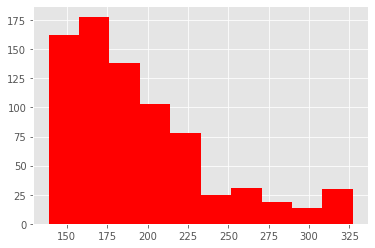

In [12]:
#check the skewness of Close
print ("The skewness of Close on training data is:", data['Close'].skew())
plt.hist(data['Close'], color='red')
plt.show()

The skewness of the log of Close on the data is: 0.7481419643450172


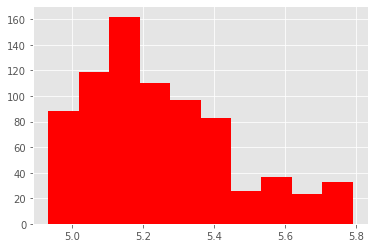

In [13]:
#taking log of Close to reduce the skewness
target = np.log(data['Close'])
print ("The skewness of the log of Close on the data is:", target.skew())
plt.hist(target, color='red')
plt.show()

In [14]:
#check for missing values
null_data = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))[:50]

null_data.columns = ['Null Count']
null_data.index.name = 'Feature'
null_data

,Null Count
Feature,
Day,0
Month,0
Year,0
Adj Close,0
Volume,0
Close,0
Open,0
Low,0
High,0


In [15]:
#create a DF for log transformation of Close
data['logClose']= np.log(data['Close']+1)

data.head()
data.shape

(778, 11)

In [16]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day,logClose
0,2017-03-03,139.830002,138.589996,138.779999,139.779999,21108100.0,133.788147,2017,3,3,4.947198
1,2017-03-06,139.770004,138.600006,139.369995,139.339996,21750000.0,133.367004,2017,3,6,4.944068
2,2017-03-07,139.979996,138.789993,139.059998,139.520004,17446300.0,133.539307,2017,3,7,4.945350
3,2017-03-08,139.800003,138.820007,138.949997,139.000000,18707200.0,133.041580,2017,3,8,4.941642
4,2017-03-09,138.789993,137.050003,138.740005,138.679993,22155900.0,132.735291,2017,3,9,4.939354


In [17]:
x = data.drop(columns = ['Date', 'logClose', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'])
y = data['logClose']

display(x.head())
display(y.head())

,Year,Month,Day
0,2017,3,3
1,2017,3,6
2,2017,3,7
3,2017,3,8
4,2017,3,9


0    4.947198
1    4.944068
2    4.945350
3    4.941642
4    4.939354
Name: logClose, dtype: float64

In [18]:
#split the given train dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.35, shuffle=False)
x_train.head()

,Year,Month,Day
0,2017,3,3
1,2017,3,6
2,2017,3,7
3,2017,3,8
4,2017,3,9


In [19]:
#import needed libraries
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

#create a function to calculate the mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def printScore(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
    
    print('Evaluation Metrics')
    print('MAE         : %0.4f ' % mae)
    print('MAPE        : %0.4f ' % mape)
    print('RMSLE       : %0.4f ' % rmsle)   

!pip install lightgbm

In [20]:
#Linear Regression

lr = LinearRegression(n_jobs= -1)

lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)

print('-------Linear Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = lr.predict(x_test)

print('')
print('-------Linear Regression(on Test Set)------')
printScore(y_test, y_pred)

-------Linear Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0699 
MAPE        : 1.3487 
RMSLE       : 0.0145 

-------Linear Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.1167 
MAPE        : 2.0822 
RMSLE       : 0.0260 


In [21]:
#LR_Lasso
model_lasso = Lasso(random_state=42,alpha=0.00035)
lr_lasso = make_pipeline(RobustScaler(), model_lasso)
lr_lasso.fit(x_train,y_train)



y_pred = lr_lasso.predict(x_train)

print('-------LR_lasso Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = lr_lasso.predict(x_test)

print('')
print('-------LR_lasso Regression(on Test Set)------')
printScore(y_test, y_pred)

-------LR_lasso Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0700 
MAPE        : 1.3510 
RMSLE       : 0.0145 

-------LR_lasso Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.1174 
MAPE        : 2.0941 
RMSLE       : 0.0261 


In [22]:
#LGBM Regression
lgb = lgb.LGBMRegressor()
lgb.fit(x_train, y_train)

y_pred = lgb.predict(x_train)

print('-------LGBM Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = lgb.predict(x_test)

print('')
print('-------LGBM Regression(on Test Set)------')
printScore(y_test, y_pred)

-------LGBM Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0121 
MAPE        : 0.2347 
RMSLE       : 0.0027 

-------LGBM Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.2342 
MAPE        : 4.1757 
RMSLE       : 0.0518 


In [23]:
#RandomForest Regression
forest_reg = RandomForestRegressor(n_estimators=1, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
forest_reg.fit(x_train, y_train)

y_pred = forest_reg.predict(x_train)

print('-------RandomForest Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = forest_reg.predict(x_test)

print('')
print('-------RandomForest Regression(on Test Set)------')
printScore(y_test, y_pred)

-------RandomForest Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0099 
MAPE        : 0.1914 
RMSLE       : 0.0055 

-------RandomForest Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.3034 
MAPE        : 5.4590 
RMSLE       : 0.0567 


In [24]:
#GBoost Regression
model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.0156,
                                         max_depth=4, max_features='sqrt',
                                         min_samples_leaf=15, min_samples_split=10, 
                                         loss='huber', random_state=42)

model_GBoost.fit(x_train, y_train)

y_pred = model_GBoost.predict(x_train)

print('-------GradientBoosting Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = model_GBoost.predict(x_test)

print('')
print('------- GradientBoosting Regression(on Test Set)------')
printScore(y_test, y_pred)

-------GradientBoosting Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0099 
MAPE        : 0.1926 
RMSLE       : 0.0023 

------- GradientBoosting Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.2398 
MAPE        : 4.2802 
RMSLE       : 0.0520 


In [25]:
#XGBoost Regression
XGB_regr = xgb.XGBRegressor(learning_rate=0.01,n_estimators=3460,
                             max_depth=3, min_child_weight=0,
                             gamma=0, subsample=0.7,
                             colsample_bytree=0.7,
                             objective='reg:linear', nthread=-1,
                             scale_pos_weight=1, seed=27,
                             reg_alpha=0.00006)

XGB_regr.fit(x_train, y_train)

y_pred = XGB_regr.predict(x_train)

print('-------XGB Regression(on Training Set)--------')
printScore(y_train, y_pred)

y_pred = XGB_regr.predict(x_test)

print('')
print('------- XGB Regression(on Test Set)------')
printScore(y_test, y_pred)

[13:13:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-------XGB Regression(on Training Set)--------
Evaluation Metrics
MAE         : 0.0155 
MAPE        : 0.3008 
RMSLE       : 0.0033 

------- XGB Regression(on Test Set)------
Evaluation Metrics
MAE         : 0.2471 
MAPE        : 4.4120 
RMSLE       : 0.0532 


In [26]:
# showing the visualization of the predicted stock prices vs the actual stock prices using different models
def VizPricePredict(model, name):
    PredictPrice = np.exp(model.predict(x))-1
    
    plt.figure(figsize = (18,9))
    plt.plot(data['Adj Close'], color = 'black', label = 'Actual Stock Price')
    plt.plot(PredictPrice, color = 'green', label = 'Predicted Stock Price')
    plt.title('Stock Price Prediction-'+name, fontsize=23)
    plt.xlabel('Time Unit', fontsize=18)
    plt.ylabel('Stock Price', fontsize=18)
    plt.legend(prop={'size': 18})
    plt.show()

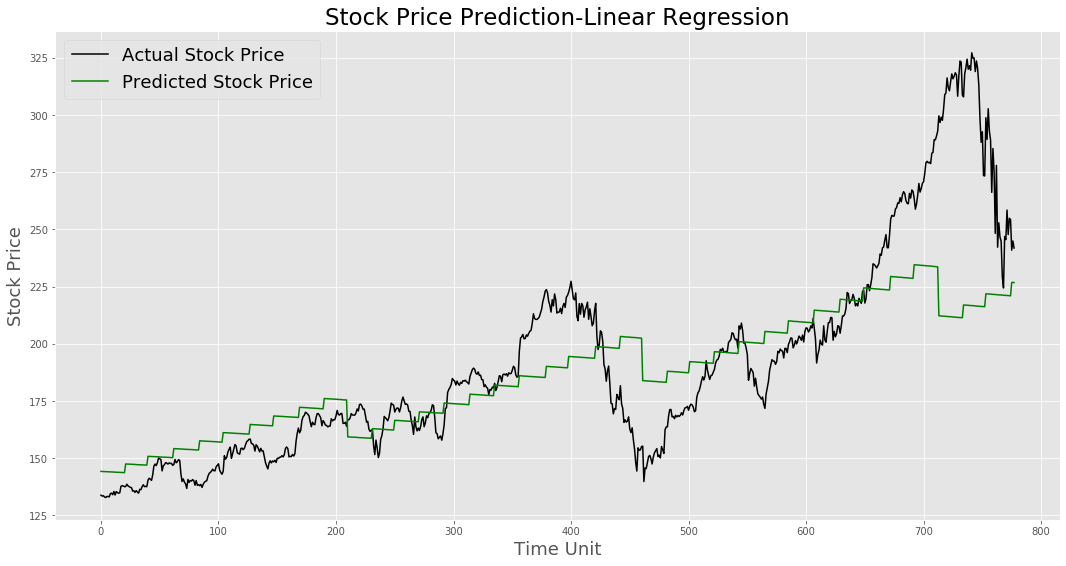

In [27]:
VizPricePredict(lr, 'Linear Regression')

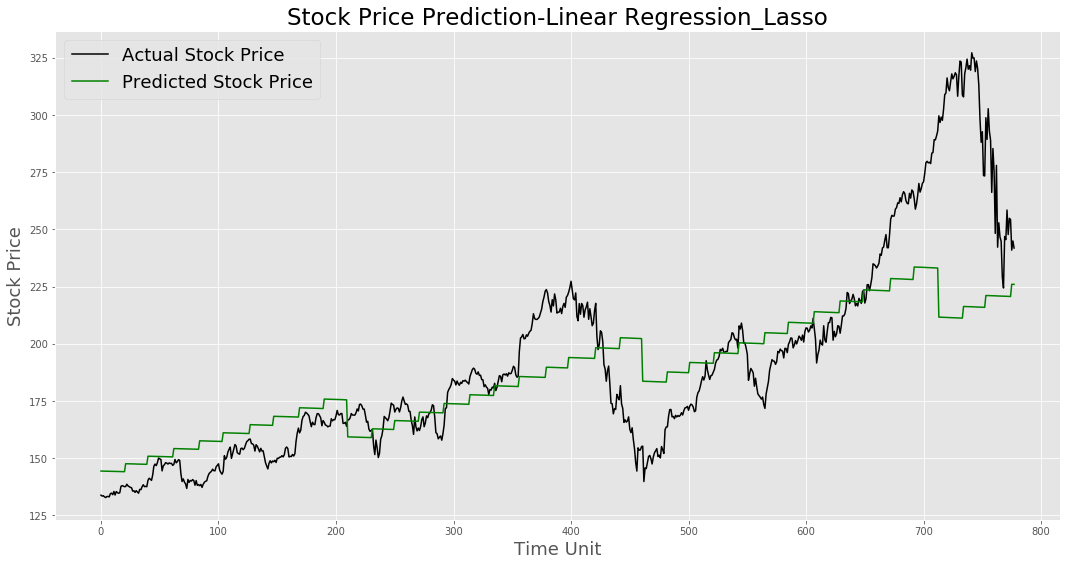

In [28]:
VizPricePredict(lr_lasso, 'Linear Regression_Lasso')

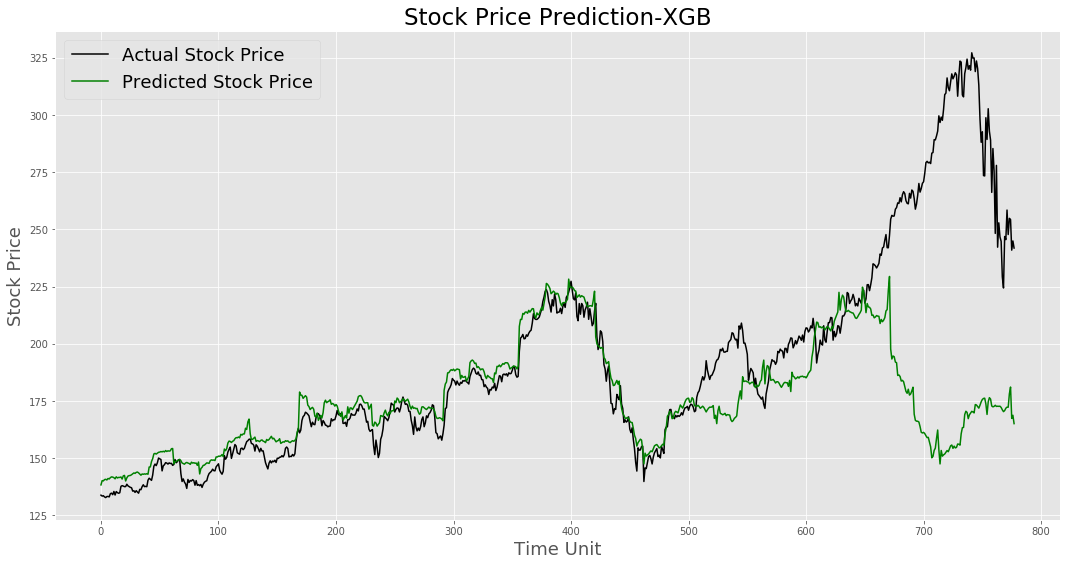

In [29]:
VizPricePredict(XGB_regr, 'XGB')

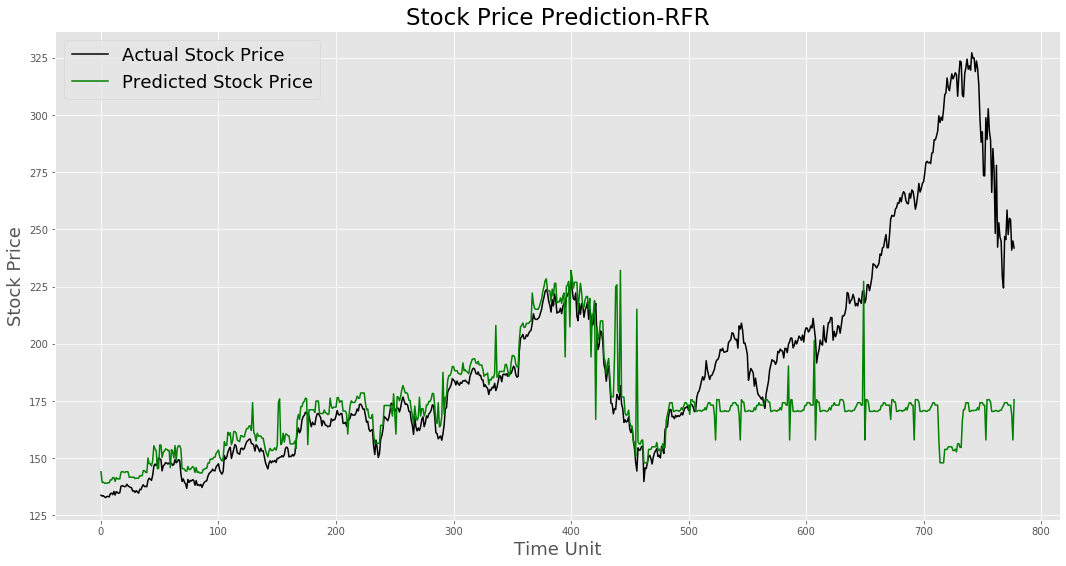

In [30]:
VizPricePredict(forest_reg, 'RFR')

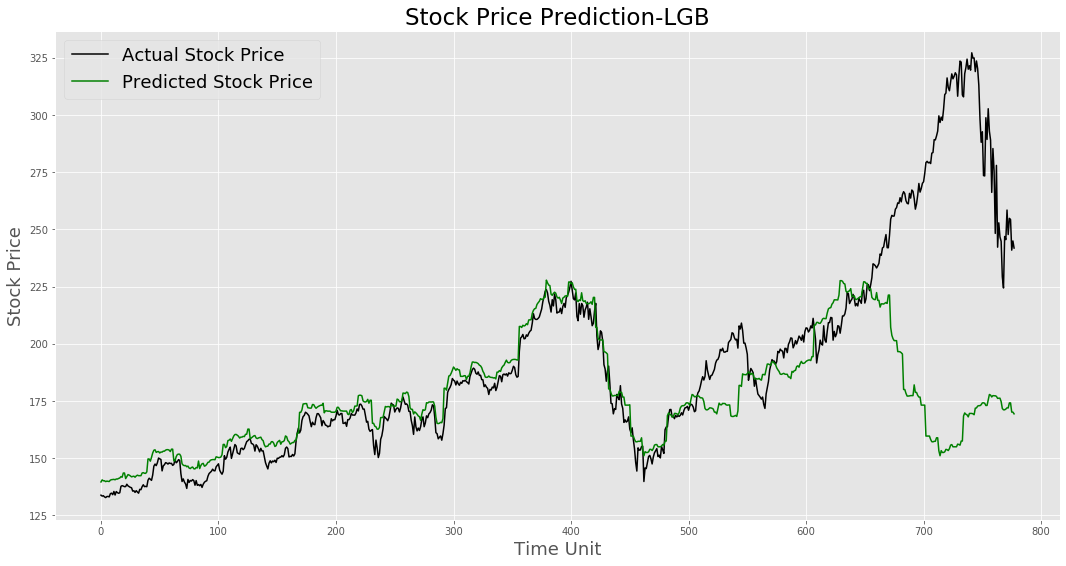

In [31]:
VizPricePredict(lgb, 'LGB')

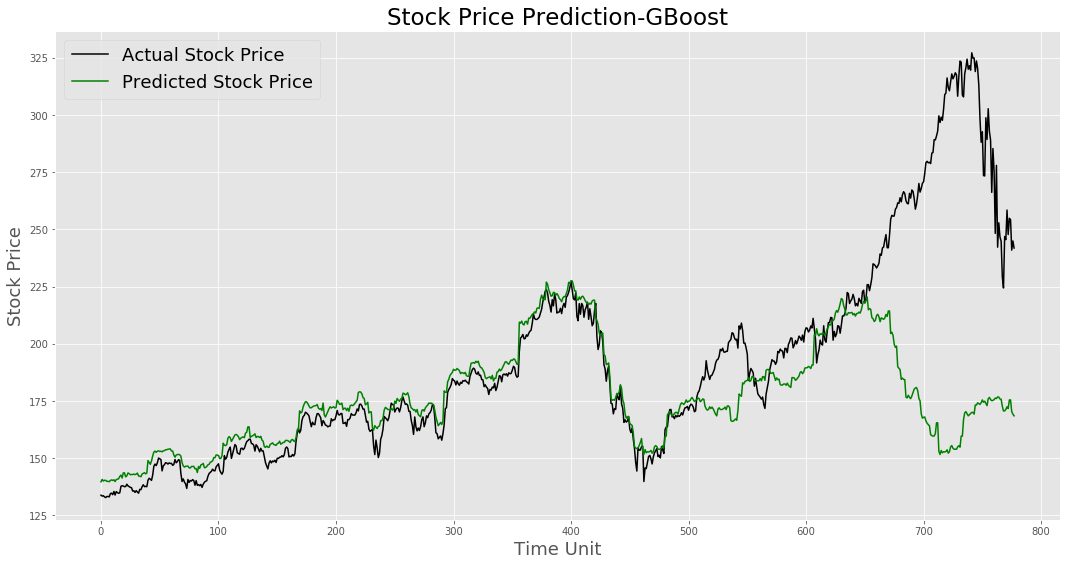

In [32]:
VizPricePredict(model_GBoost, 'GBoost')

In [34]:
#making stock price prediction for the future
import datetime
#a function to get user's input for the date for the stock price prediction
def ObtainDate(text):
    isValid=False
    while not isValid:
        userIn = input(text)
        try: # strptime throws an exception if the input doesn't match the pattern
            d = datetime.datetime.strptime(userIn, "%d/%m/%Y")
            isValid=True
        except:
            print ("Doh, try again!\n")
    return d

a = ObtainDate('Enter the current date (dd/mm/yyyy)(for example: 01/02/2025):')

targetDate = pd.DataFrame({'Year': [a.year], 'Month': [a.month], 'Day': [a.day]})
livePrice = float(input("Enter the current price of the stock: "))

def futurePrice(model, td):
    futurePrice = (np.exp(model.predict(td))-1)*1.1
    return futurePrice

#using the best models to predict

print ('Using model of LR, the future stock price is:', futurePrice(lr, targetDate))
print ('Using model of LR_Lasso, the future stock price is:', futurePrice(lr_lasso, targetDate))
print ('Using model of XBG, the future stock price is:', futurePrice(XGB_regr , targetDate))
print ('Using model of RFR, the future stock price is:', futurePrice(forest_reg , targetDate))
print ('Using model of LGBM, the future stock price is:', futurePrice(lgb, targetDate))
print ('Using model of GB, the future stock price is:', futurePrice(model_GBoost, targetDate))

accurPredict = (1 - (abs(futurePrice(lr, targetDate)-livePrice)/livePrice))*100
print ('The best prediction above is', "%.2f" %accurPredict, '% accurate compared to the current actual price of the stock!')

Enter the current date (dd/mm/yyyy)(for example: 01/02/2025):03/04/2020
Enter the current price of the stock: 241
Using model of LR, the future stock price is: [249.4154833]
Using model of LR_Lasso, the future stock price is: [248.54759035]
Using model of XBG, the future stock price is: [181.56859]
Using model of RFR, the future stock price is: [193.08299866]
Using model of LGBM, the future stock price is: [186.26974494]
Using model of GB, the future stock price is: [185.31150929]
The best prediction above is 96.51 % accurate compared to the current actual price of the stock!


In [35]:
#combine two models with and try to produce better predictive results
def VizPricePredictComb(model1, model2, w1, w2):
    PredictPrice = w1*(np.exp(model1.predict(x))-1)+w2*(np.exp(model2.predict(x))-1)
    
    plt.figure(figsize = (18,9))
    plt.plot(data['Adj Close'], color = 'black', label = 'Actual Stock Price')
    plt.plot(PredictPrice, color = 'green', label = 'Predicted Stock Price')
    plt.title('Stock Price Prediction Using Combined Models', fontsize=23)
    plt.xlabel('Time Unit', fontsize=18)
    plt.ylabel('Stock Price', fontsize=18)
    plt.legend(prop={'size': 18})
    plt.show()

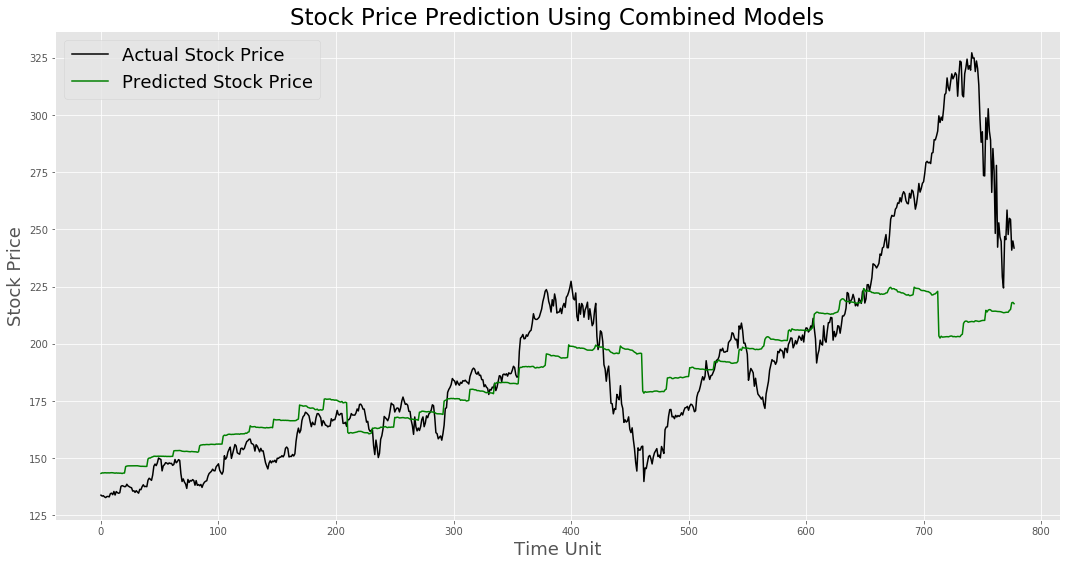

In [36]:
#linear regression+XGB, weights: 0.85, 0.15
VizPricePredictComb(lr, XGB_regr, 0.85, 0.15)

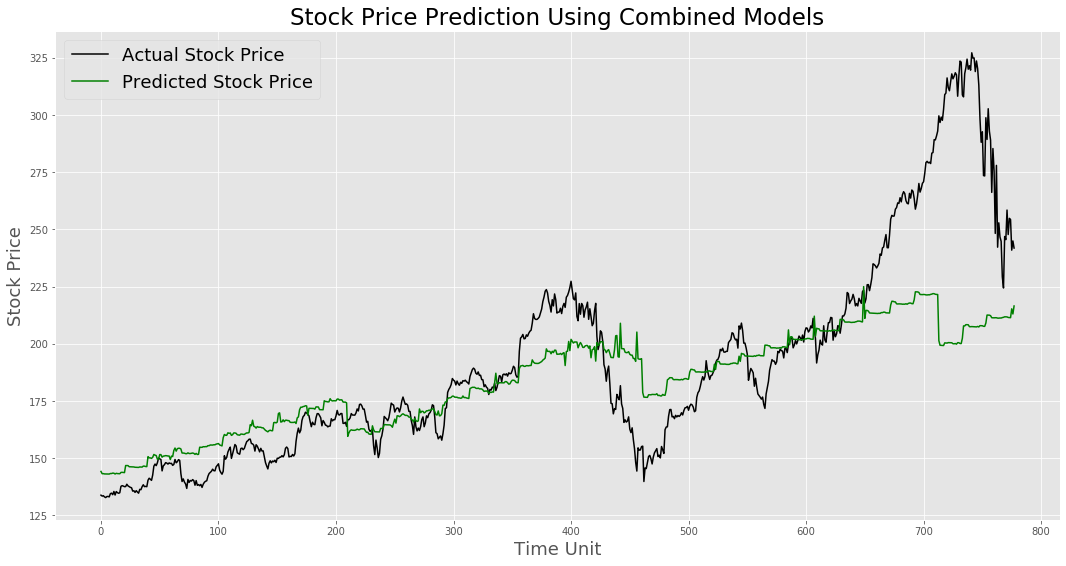

In [37]:
#linear regression+RFR, weights: 0.8, 0.2
VizPricePredictComb(lr, forest_reg, 0.8, 0.2)

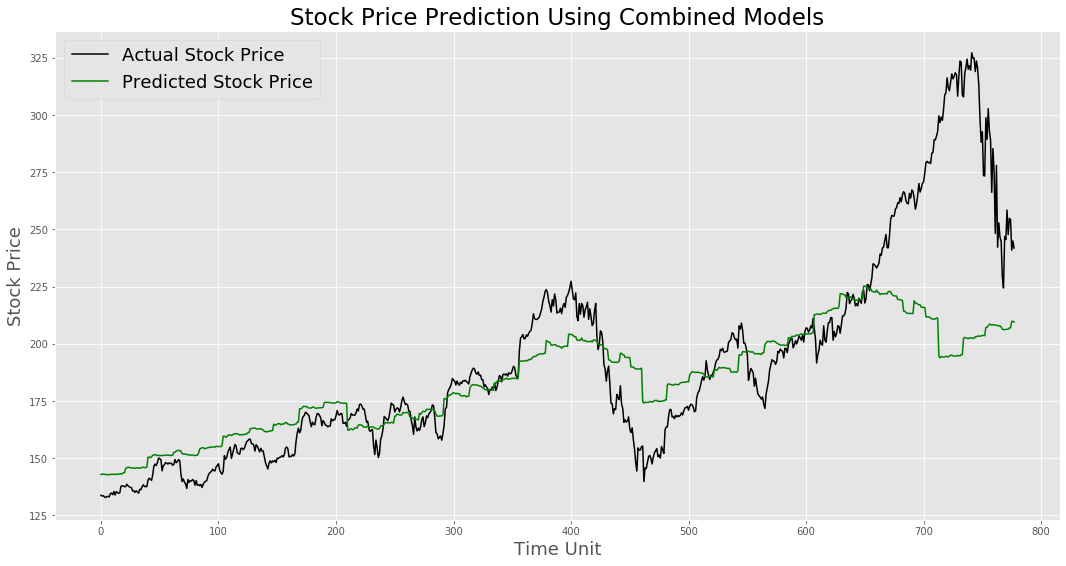

In [38]:
#linear regression+RFR, weights: 0.7, 0.3
VizPricePredictComb(lr, lgb, 0.7, 0.3)

## Since the combination of the models of linear regression and XGB does a great job in predicting the price of the stock, with the weights, it will be used to predict the future return of the stock if invested today.

In [77]:
#future returns on investment in the chosen stock from today's purchase
FutTarDate = ObtainDate('Enter the target sold date for the stock (dd/mm/yyyy)(for example: 01/02/2025):')

targetDate = pd.DataFrame({'Year': [FutTarDate.year], 'Month': [FutTarDate.month], 'Day': [FutTarDate.day]})

def whole_data_training_comb(model1, model2, w1, w2):
        model1.fit(x,y)
        model2.fit(x,y)
        PredictPrice = w1*(np.exp(model1.predict(targetDate))-1)+w2*(np.exp(model2.predict(targetDate))-1)
        return PredictPrice
    
PredictPrice = whole_data_training_comb(lr, XGB_regr, 0.85, 0.15)

returns = ((PredictPrice - livePrice)/livePrice)*100

print('The future price on the target date will be prediected as: ', PredictPrice)
print ('If invested today, the future returns on the chosen stock till the target date is: ', "%.2f" %returns, '%!')

Enter the target sold date for the stock (dd/mm/yyyy)(for example: 01/02/2025):05/03/2021
[00:00:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The future price on the target date will be prediected as:  [84.14535809]
If invested today, the future returns on the chosen stock till the target date is:  74.90 %!


# NLP

In this part, we pre-processed the description of the companies to be prepared for the recommendtion system later on


In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance

In [2]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# Libraries for text preprocessing
import re # remove punctuations, special characters and digits
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
### Please download these pakages for running this code:
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [5]:
dataset = pd.read_csv('SP500IT.csv')
#data.head()

In [6]:
#dataset.set_index('ID',inplace= True)
#data.head()


# Only the information in description will be cleaned and employed

In [7]:
dataset[['Symbol','Name','Description']].head()

,Symbol,Name,Description
0,AAPL,Apple Inc,"Apple Inc. designs, manufactures, and markets ..."
1,ACN,Accenture Plc,"Accenture plc provides consulting, technology,..."
2,ADBE,Adobe Systems Inc,Adobe Inc. operates as a diversified software ...
3,ADI,Analog Devices,"Analog Devices, Inc. designs, manufactures, an..."
4,ADP,Automatic Data Procs,"Automatic Data Processing, Inc. provides cloud..."


In [8]:
dataset_Org = pd.DataFrame(dataset)

In [9]:
stop_words = set(stopwords.words("english"))

# Enter the keywords first for the recommendation program to continue

In [10]:
#cust_input = "I want to have a good apple stock"
#cust_input = "Western Digital Corporation develops, manufactures, and sells data storage devices and solutions worldwide. It offers client devices, including hard disk drives (HDDs) and solid state drives (SSDs) for computing devices, such as desktop and notebook personal computers (PCs), security surveillance systems, gaming consoles, and set top boxes; flash-based embedded storage products for mobile phones, tablets, notebook PCs, and other portable and wearable devices, as well as automotive, Internet of Things, industrial, and connected home applications; flash-based memory wafers; and embedded storage solutions and flash products, such as multi-chip package solutions. The company also provides data center devices and solutions comprising enterprise helium hard drives; enterprise SSDs consisting of flash-based SSDs and software solutions for use in enterprise servers, online transactions, data analysis, and other enterprise applications; data center solutions, including HDDs and drive configurations for use in data storage systems and tiered storage models; system solutions that offer petabyte scalable capacity; and data storage platforms and systems. In addition, it offers client solutions, such as external HDD storage products in mobile and desktop form; client SSDs; removable cards that are used in consumer devices comprising mobile phones, tablets, imaging systems, still and action video cameras, and security surveillance systems; universal serial bus flash drives for use in the computing and consumer markets; and wireless drive products used in-field back up of created content, as well as wireless streaming of high-definition movies, photos, music, and documents to tablets, smartphones, and PCs. The company sells its products under the HGST, SanDisk, and WD brands to original equipment manufacturers, distributors, resellers, cloud infrastructure players, and retailers. Western Digital Corporation was founded"
# This is a short sentence from the Western DIgital's discription and it recommends the right company:
#cust_input = "  and security surveillance systems; universal serial bus flash drives for use in the computing and consumer markets" 
# This is a short sentence from the Fleetcor Technologies Inc's discription and it recommends the right company:
#cust_input = "payments products include virtual cards, purchasing cards, travel and entertainment cards, payroll cards, and cross-border payment facilitation. "
# This is a short sentence from the Seagate's discription and it recommends the right company:
#cust_input = "The company manufactures and distributes hard disk drives; solid state drives"
#Now try a sentence of really from customer search:
cust_input = input("Please enter some keywords:")

Please enter some keywords:APPLE


In [11]:
corpus_input= []
#Remove punctuations
input_text = re.sub('[^a-zA-Z,]', ' ', cust_input)
print(input_text)
#Convert to lowercase
input_text = input_text.lower()
    
#remove tags
input_text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",input_text)

# remove special characters and digits
input_text=re.sub("(\\d|\\W)+"," ",input_text)
    
##Convert to list from string
input_text = input_text.split()
print(input_text)

APPLE
['apple']


In [12]:
lem = WordNetLemmatizer()
input_text = [lem.lemmatize(word) for word in input_text if not word in  stop_words] 
input_text = " ".join(input_text)

corpus_input.append(str(input_text))
print(input_text)
corpus_input

cust_input_tokenized = nltk.word_tokenize(input_text) #tokenize customer input after preprocessed
input_text=cust_input_tokenized

apple


In [13]:
BoWA = cust_input_tokenized
BoWA

['apple']

In [14]:
Id = int(100000)
dataset = dataset_Org.append(pd.Series(Id,index=['ID']), ignore_index=True)
dataset.loc[dataset['ID'] == 100000, ['Name','Description']] = ("customer request", corpus_input)
dataset

,ID,Symbol,Name,Sector,Industry,Full Time Employees,CEO,Address,Description
0,1.0,AAPL,Apple Inc,Technology,Consumer Electronics,"137,000",Timothy D. Cook,"One Apple Park Way\nCupertino, CA 95014\nUnite...","Apple Inc. designs, manufactures, and markets ..."
1,2.0,ACN,Accenture Plc,Technology,Information Technology Services,492000,Julie T. Spellman Sweet,1 Grand Canal Square\nGrand Canal Harbour\nDub...,"Accenture plc provides consulting, technology,..."
2,3.0,ADBE,Adobe Systems Inc,Technology,Software - Application,21357,Shantanu Narayen,"345 Park Avenue\nSan Jose, CA 95110\nUnited St...",Adobe Inc. operates as a diversified software ...
3,4.0,ADI,Analog Devices,Technology,Semiconductors,"15,800",Vincent T. Roche,"One Technology Way\nPO Box 9106\nNorwood, MA 0...","Analog Devices, Inc. designs, manufactures, an..."
4,5.0,ADP,Automatic Data Procs,Industrials,Business Services,"58,000",Carlos A. Rodriguez,"One ADP Boulevard\nRoseland, NJ 07068\nUnited ...","Automatic Data Processing, Inc. provides cloud..."
...,...,...,...,...,...,...,...,...,...
63,64.0,WDC,Western Digital Corporation,Technology,Data Storage,61800,Stephen D. Milligan,"5601 Great Oaks Parkway\nSan Jose, CA 95119\nU...","Western Digital Corporation develops, manufact..."
64,65.0,WU,Western Union Company,Financial Services,Credit Services,12000,Hikmet Ersek,"7001 East Belleview Avenue\nDenver, CO 80237\n...",The Western Union Company provides money movem...
65,66.0,XLNX,Xilinx Inc,Technology,Semiconductors,4433,Victor Peng,"2100 Logic Drive\nSan Jose, CA 95124\nUnited S...","Xilinx, Inc. designs and develops programmable..."
66,67.0,XRX,Xerox Holdings Corporation,Technology,Information Technology Services,27600,Giovanni G. Visentin,"201 Merritt 7\nPO Box 4505\nNorwalk, CT 06851\...","Xerox Holdings Corporation designs, develops, ..."


In [15]:
corpus= []
for i in range(0, len(dataset['Description'])):
    
    #Remove punctuations
    text = re.sub('[^a-zA-Z,]', ' ', str (dataset['Description'][i]))
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append((text))

### All punctuations, special characters, tags are removed and uppercase letters has been standardized to lowercase. Therefore, each stock company's desciption is standardized as a group of lowercased words seperated by a single space so the system can process easily later.

In [16]:
dataset['Processed'] = corpus

In [17]:
dataset[['Description','Processed']].head()

,Description,Processed
0,"Apple Inc. designs, manufactures, and markets ...",apple inc design manufacture market smartphone...
1,"Accenture plc provides consulting, technology,...",accenture plc provides consulting technology o...
2,Adobe Inc. operates as a diversified software ...,adobe inc operates diversified software compan...
3,"Analog Devices, Inc. designs, manufactures, an...",analog device inc design manufacture market in...
4,"Automatic Data Processing, Inc. provides cloud...",automatic data processing inc provides cloud b...


## The "Proccessed" column will be converted into bag of words (the "BoWB" column) which is a vector of the words as elements  for later algorithm implementation

In [18]:
BoWB =[]
for i in range(0, len(dataset['Processed'])):
    #Remove punctuations
    text_BoW = re.sub('[^a-zA-Z]', ' ', dataset['Processed'][i])
    text_BoW = text_BoW.split()
    BoWB.append((text_BoW))

In [19]:
dataset['BoWB'] = BoWB
dataset[['Description','Processed','BoWB']].head()

,Description,Processed,BoWB
0,"Apple Inc. designs, manufactures, and markets ...",apple inc design manufacture market smartphone...,"[apple, inc, design, manufacture, market, smar..."
1,"Accenture plc provides consulting, technology,...",accenture plc provides consulting technology o...,"[accenture, plc, provides, consulting, technol..."
2,Adobe Inc. operates as a diversified software ...,adobe inc operates diversified software compan...,"[adobe, inc, operates, diversified, software, ..."
3,"Analog Devices, Inc. designs, manufactures, an...",analog device inc design manufacture market in...,"[analog, device, inc, design, manufacture, mar..."
4,"Automatic Data Processing, Inc. provides cloud...",automatic data processing inc provides cloud b...,"[automatic, data, processing, inc, provides, c..."


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8, stop_words=stop_words, max_features=10000, ngram_range=(1,1))
X=cv.fit_transform(dataset['Processed'])

## We turned these BoWB into vector for later use of recommendation part

In [21]:
dataset['dicB'] = X
dataset[['Description','Processed','BoWB','dicB']].head()

,Description,Processed,BoWB,dicB
0,"Apple Inc. designs, manufactures, and markets ...",apple inc design manufacture market smartphone...,"[apple, inc, design, manufacture, market, smar...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."
1,"Accenture plc provides consulting, technology,...",accenture plc provides consulting technology o...,"[accenture, plc, provides, consulting, technol...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."
2,Adobe Inc. operates as a diversified software ...,adobe inc operates diversified software compan...,"[adobe, inc, operates, diversified, software, ...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."
3,"Analog Devices, Inc. designs, manufactures, an...",analog device inc design manufacture market in...,"[analog, device, inc, design, manufacture, mar...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."
4,"Automatic Data Processing, Inc. provides cloud...",automatic data processing inc provides cloud b...,"[automatic, data, processing, inc, provides, c...","(0, 106)\t9\n (0, 878)\t2\n (0, 512)\t1\n ..."


>>The following are our new progress since last submission. The recommendation of companies upon customer's key word input searching is accomplished. When the customer inputs some words, such as key words of tech terms, or a certain types of products, the outcome is excellent with those searched key words in the discriptions of those correspondingly recommended companies.

### import neccessary libraries

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.svm import SVC
from sklearn.metrics.pairwise import sigmoid_kernel 

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

In [23]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(dataset['Processed'])
tfidf_matrix 

<68x1965 sparse matrix of type '<class 'numpy.float64'>'
	with 6317 stored elements in Compressed Sparse Row format>

In [24]:
tf.fit(dataset['Processed'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=0, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

## The following is now to compare the input words for searching with all the company discriptions so to find and recommend the companies with their discriptions closest to the searching key words
## With trying for a few types of the similarity comparison engines, the finally used one is consine similarity with Sigmoid kernel which ususally gives the best outcome, and it is true for our case here as well.

In [25]:
cosine_similarities = sigmoid_kernel(tfidf_matrix, tfidf_matrix) 

similarities = cosine_similarities 

results = {}
for idx, row in dataset.iterrows():
    similar_indices = similarities[idx].argsort()[:-100:-1] 
    similar_items = [(similarities[idx][i], dataset['ID'][i]) for i in similar_indices] 
    results[row['ID']] = similar_items[1:]

# Recommendation 20 outputs based on the keyword entered previously

In [29]:
def item(id):
    return dataset.loc[dataset['ID'] == id]['Name'].tolist()[0].split(' - ')[0]


def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended: " + item(rec[1]) + " (score:" + str(rec[0]) + ")")
        # print(rec)

# recommend(item_id=100000, num=100)
recommend(item_id=100000, num=20)

Recommending 20 products similar to customer request...
-------
Recommended: Apple Inc (score:0.7617239078769025)
Recommended: Xilinx Inc (score:0.7615941559557649)
Recommended: CDW Corporation (score:0.7615941559557649)
Recommended: Hewlett Packard Enterprise Company (score:0.7615941559557649)
Recommended: Global Payments Inc (score:0.7615941559557649)
Recommended: Corning Inc (score:0.7615941559557649)
Recommended: Fortinet Inc (score:0.7615941559557649)
Recommended: Fleetcor Technologies Inc (score:0.7615941559557649)
Recommended: Flir Systems Inc (score:0.7615941559557649)
Recommended: Fiserv Inc (score:0.7615941559557649)
Recommended: Fidelity National Information Services Inc (score:0.7615941559557649)
Recommended: F5 Networks Inc (score:0.7615941559557649)
Recommended: Dxc Technology Company (score:0.7615941559557649)
Recommended: Citrix Systems Inc (score:0.7615941559557649)
Recommended: Cognizant Technology Solutions Corporation (score:0.7615941559557649)
Recommended: Cisco Sy